# **Univariate Time Series Forcasting using ARIMA & SARIMAX**

**Problem Statement**  
- To forecast the sales for Grocery Store for the next 12 months

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
# load data
df=pd.read_csv("/content/Grocery-Store-Sales-Time-Series-Dataset.csv",skiprows=7)
df.columns=["date","sales"]
df.head()

,date,sales
0,Jan-21,63473.0
1,Feb-21,57967.0
2,Mar-21,63609.0
3,Apr-21,62593.0
4,May-21,66993.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(51, 2)

In [ ]:
df.head()

,date,sales
0,Jan-21,63473.0
1,Feb-21,57967.0
2,Mar-21,63609.0
3,Apr-21,62593.0
4,May-21,66993.0


In [ ]:
df.dtypes

,0
date,object
sales,float64


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%b-%y')

In [ ]:
df.dtypes

,0
date,datetime64[ns]
sales,float64


In [ ]:
df.head()

,date,sales
0,2021-01-01,63473.0
1,2021-02-01,57967.0
2,2021-03-01,63609.0
3,2021-04-01,62593.0
4,2021-05-01,66993.0


In [ ]:
df.set_index("date",inplace=True)

In [ ]:
df.head()

,sales
date,
2021-01-01,63473.0
2021-02-01,57967.0
2021-03-01,63609.0
2021-04-01,62593.0
2021-05-01,66993.0


**Checking stationarity of given series**

- Mean and Variance should be constant over time.

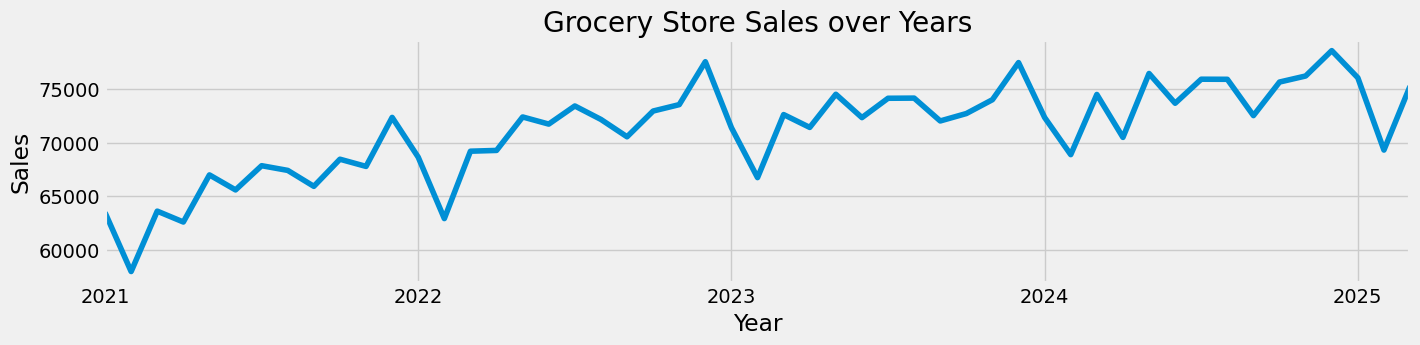

In [ ]:
plt.figure(figsize=(15,3))
df["sales"].plot()
plt.title("Grocery Store Sales over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

Trend Component is present (Up Trend). Seasonality is present. Series is not stationary.

Use differencing technique to make it stationary

In [ ]:
# taking 1st level of differencing
df1=df.diff()
df1.dropna(inplace=True)

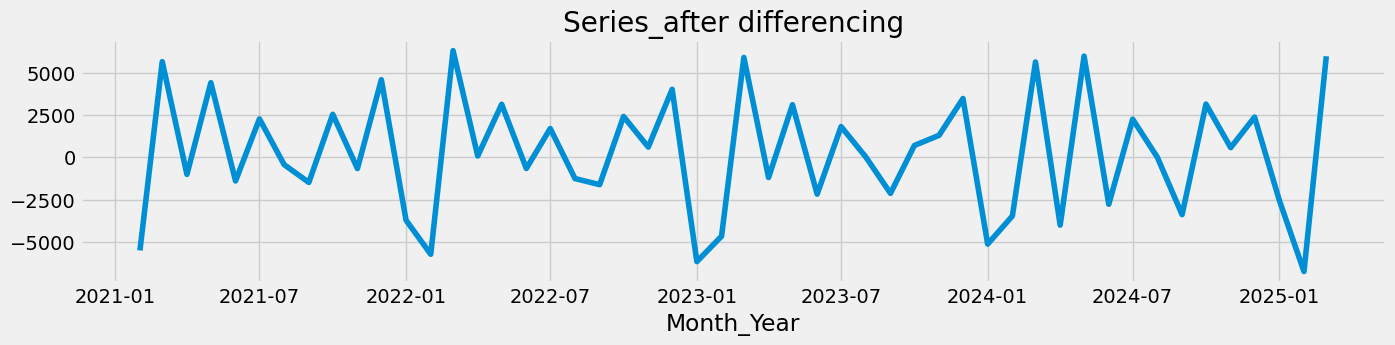

In [ ]:
# plotting the sales trend over years
plt.figure(figsize=(15,3))
plt.plot(df1["sales"])
plt.title("Series_after differencing")
plt.xlabel("Month_Year")
plt.show()

Series is Stationary after taking 1st level of differencing.

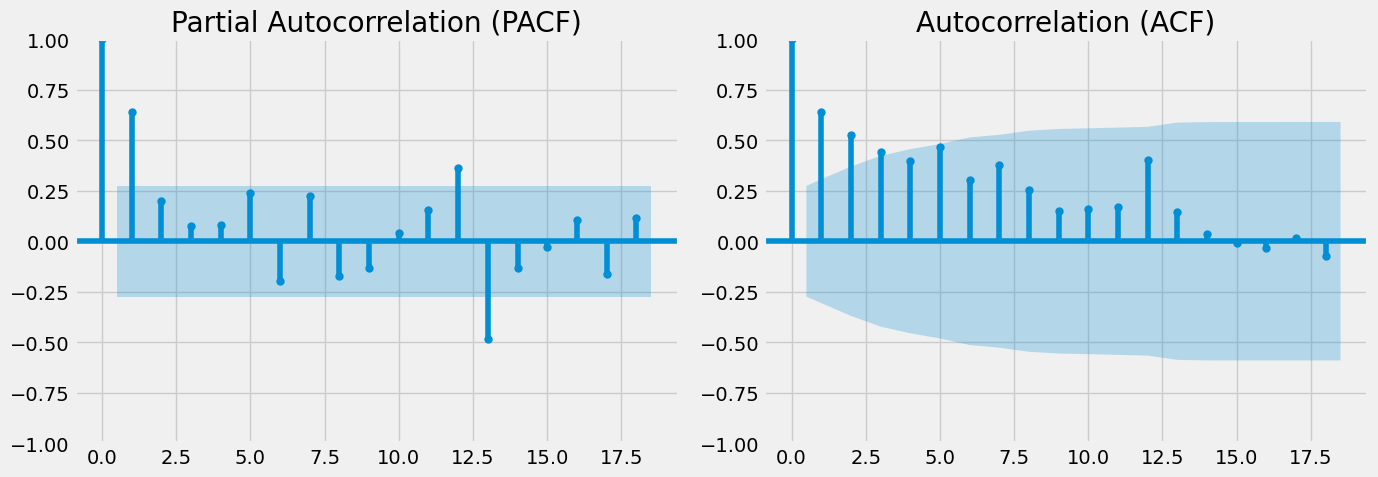

In [ ]:
# import plot_acf, plot_pacf functions from statsmodels library
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# create a 1-row, 2-column subplot
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# plot PACF on the first subplot
plot_pacf(df["sales"], ax=ax[0])
ax[0].set_title("Partial Autocorrelation (PACF)")

# plot ACF on the second subplot
plot_acf(df["sales"], ax=ax[1])
ax[1].set_title("Autocorrelation (ACF)")

plt.tight_layout()
plt.show()

In [ ]:
# splitting the DataFrame into training and testing datasets
train_df=df[ :- 12]
test_df=df[-12:]

**Building ARIMA Model on Training Data**

In [ ]:
# import ARIMA class from statsmodels library
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train_df.shape

(39, 1)

In [ ]:
# create instance of ARIMA class
model_arima=ARIMA(train_df,order=(1,1,1))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# build the ARIMA Model
model_fit=model_arima.fit()


In [ ]:
# summary function will help to have closer look at statistical values
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -363.220
Date:                Fri, 14 Nov 2025   AIC                            732.439
Time:                        12:32:39   BIC                            737.352
Sample:                    01-01-2021   HQIC                           734.187
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.031     32.168      0.000       0.939       1.061
ma.L1         -0.9997      0.332     -3.012      0.003      -1.650      -0.349
sigma2      1.173e+07   3.11e-08   3.77e+14      0.0

In [ ]:
# forecasting the next 12 months
n_forecast = 12

# getting predictions for the forecast period (predictions for testing data)
predict = model_fit.predict(start=len(train_df), end=len(train_df) + n_forecast - 1)

# renaming series for clarity
predict.rename("predicted",inplace=True)

predict

,predicted
2024-04-01,74706.778141
2024-05-01,74907.553396
2024-06-01,75108.325764
2024-07-01,75309.095246
2024-08-01,75509.861842
2024-09-01,75710.625551
2024-10-01,75911.386374
2024-11-01,76112.144311
2024-12-01,76312.899362
2025-01-01,76513.651526


In [ ]:
# creating new dataframe to store predictions
pred_df = pd.DataFrame(predict)

# renaming columns for clarity
pred_df.columns=["predicted_sales"]

# rounding off values to zero decimal places
pred_df["predicted_sales"]=round(pred_df["predicted_sales"],0)

pred_df

,predicted_sales
2024-04-01,74707.0
2024-05-01,74908.0
2024-06-01,75108.0
2024-07-01,75309.0
2024-08-01,75510.0
2024-09-01,75711.0
2024-10-01,75911.0
2024-11-01,76112.0
2024-12-01,76313.0
2025-01-01,76514.0


In [ ]:
# creating new dataframe to store actual test data along with predictions by ARIMA model
actual_vs_pred=pd.concat([test_df,pred_df],axis=1)

# checking error in actual and predicted values
actual_vs_pred["error"]=actual_vs_pred["sales"]-actual_vs_pred["predicted_sales"]

# renaming columns for clarity
actual_vs_pred.rename(columns={"sales": "actual_sales"}, inplace=True)

actual_vs_pred

,actual_sales,predicted_sales,error
2024-04-01,70496.0,74707.0,-4211.0
2024-05-01,76465.0,74908.0,1557.0
2024-06-01,73686.0,75108.0,-1422.0
2024-07-01,75931.0,75309.0,622.0
2024-08-01,75923.0,75510.0,413.0
2024-09-01,72532.0,75711.0,-3179.0
2024-10-01,75667.0,75911.0,-244.0
2024-11-01,76232.0,76112.0,120.0
2024-12-01,78601.0,76313.0,2288.0
2025-01-01,76065.0,76514.0,-449.0


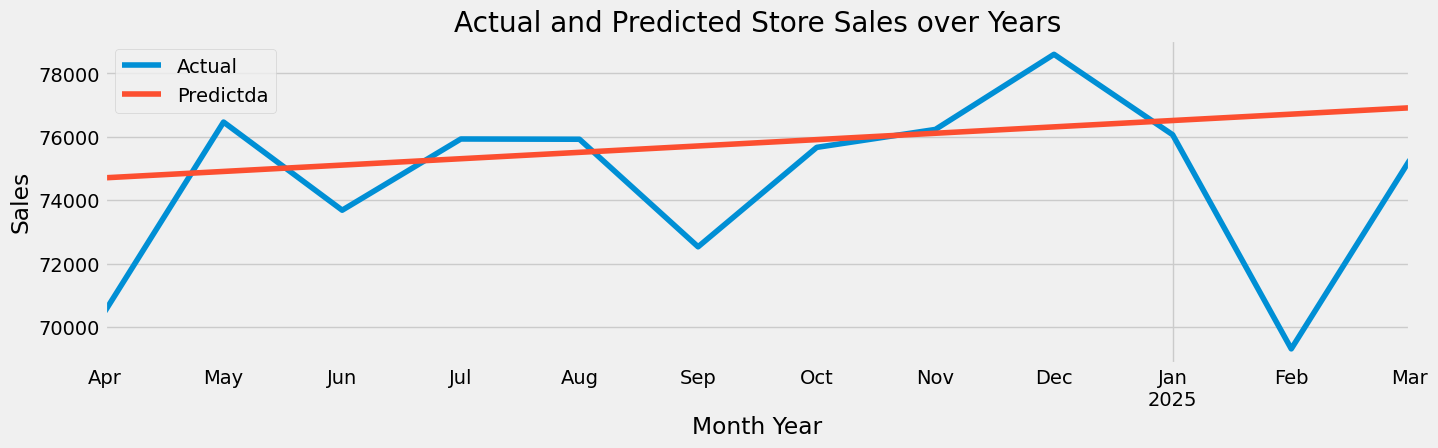

In [ ]:
# plotting actual and predicted sales for test data for comparision
plt.figure(figsize=(15,4))
actual_vs_pred["actual_sales"].plot()
actual_vs_pred["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales over Years")
plt.xlabel("Month Year")
plt.ylabel("Sales")
plt.legend(["Actual","Predictda"])
plt.show()

Actual and Predictions are not at all matching.As we have seasonality present in the data, ARIMA model cant handle the seasonality and
thats why we will be using another time series model called SARIMAX.

In [ ]:
# !pip install numpy==1.26.4
# !pip install pmdarima --no-cache-dir

**Find optimal values of non seasonal and seasonal order with auto_arima function**

In [ ]:
# import auto_arima function from pmdarima library
from pmdarima import auto_arima

# passing non stationary data to auto_arima function
auto_arima_result=auto_arima(train_df,seasonal=True,m=12)

In [ ]:
# summary function will help to have closer look at statistical values
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   39
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -212.937
Date:                              Fri, 14 Nov 2025   AIC                            431.875
Time:                                      12:35:03   BIC                            435.649
Sample:                                  01-01-2021   HQIC                           432.962
                                       - 03-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5061      2.246     -0.225      0.822      -4.909       3.896
ma.S.L12       0.58

In [ ]:
# optimal values of non-seasonal order and seasonal order
auto_arima_result.order, auto_arima_result.seasonal_order

((0, 1, 0), (1, 1, 1, 12))

**Building a SARIMAX Model on Training Data**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(train_df,order=auto_arima_result.order, seasonal_order=auto_arima_result.seasonal_order)

# building SARIMAX model
model_fit=model_sarimax.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# time period in months for which we are forecasting sales
n_forecast=12

# predict function will return series with predicted values for testing data
pred_values=model_fit.predict(start=len(train_df), end=len(train_df)+n_forecast-1)

# renaming columns for clarity
pred_values = pred_values.rename("predicted", inplace=True)

# creating new dataframe to store predicted values for test data
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2024-04-01,73143.0
2024-05-01,76347.0
2024-06-01,73994.0
2024-07-01,75861.0
2024-08-01,76011.0
2024-09-01,73825.0
2024-10-01,74415.0
2024-11-01,75698.0
2024-12-01,79199.0
2025-01-01,73506.0


In [ ]:
# creating new dataframe to store actual test data along with predictions by SARIMAX model
actual_vs_pred_df=pd.concat([test_df,pred_df],axis=1)

# checking error in actual and predicted values
actual_vs_pred_df["error"]=actual_vs_pred_df["sales"]-actual_vs_pred_df["predicted"]

# renaming columns for clarity
actual_vs_pred_df.rename(columns={"sales": "actual_sales"}, inplace=True)
actual_vs_pred_df.rename(columns={"predicted": "predicted_sales"}, inplace=True)

actual_vs_pred_df

,actual_sales,predicted_sales,error
2024-04-01,70496.0,73143.0,-2647.0
2024-05-01,76465.0,76347.0,118.0
2024-06-01,73686.0,73994.0,-308.0
2024-07-01,75931.0,75861.0,70.0
2024-08-01,75923.0,76011.0,-88.0
2024-09-01,72532.0,73825.0,-1293.0
2024-10-01,75667.0,74415.0,1252.0
2024-11-01,76232.0,75698.0,534.0
2024-12-01,78601.0,79199.0,-598.0
2025-01-01,76065.0,73506.0,2559.0


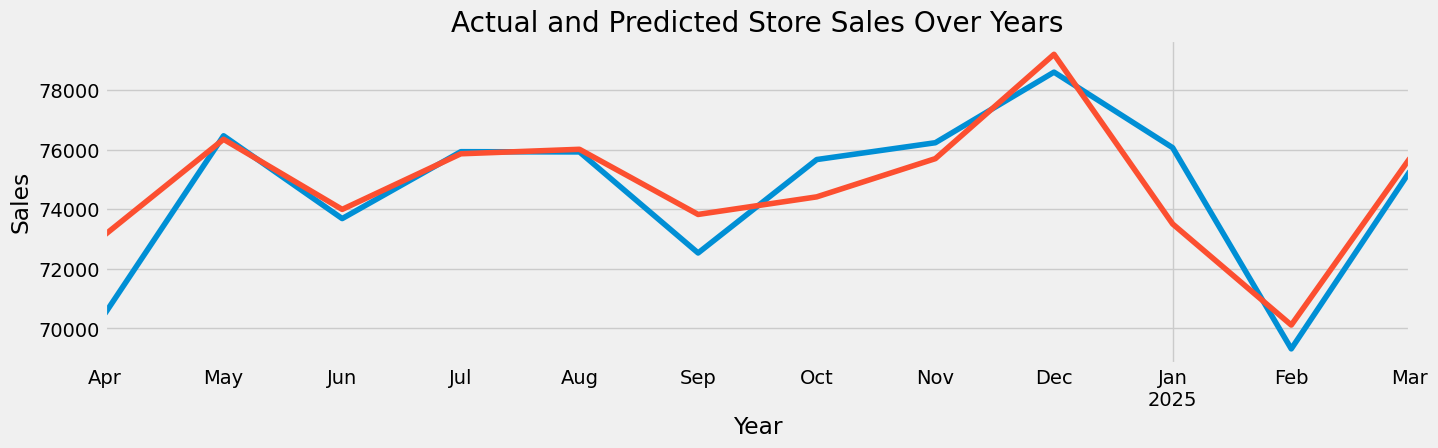

In [ ]:
# plotting actual and predicted sales over years
plt.figure(figsize=(15,4))
actual_vs_pred_df["actual_sales"].plot()
actual_vs_pred_df["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [ ]:
# passing non stationary data to auto_arima function
auto_arima_result=auto_arima(df,seasonal=True,m=12)

In [ ]:
# summary function will help to have closer look at statistical values
print(auto_arima_result.summary ())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   51
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -325.575
Date:                            Fri, 14 Nov 2025   AIC                            657.151
Time:                                    12:51:22   BIC                            662.064
Sample:                                01-01-2021   HQIC                           658.899
                                     - 03-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0399      0.134      0.297      0.767      -0.223       0.303
ar.S.L24      -0.0585      0.058   

In [ ]:
# create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(df,order=auto_arima_result.order, seasonal_order=auto_arima_result.seasonal_order)

# building SARIMAX model
model_fit=model_sarimax.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [ ]:
# time period in months for which we are forecasting sales
n_forecast=12

# predict function will return series with predicted values
pred_values=model_fit.predict(start=len(df),end=len(df)+n_forecast-1)

# renaming columns for clarity
pred_values = pred_values.rename("predicted", inplace=True)

# creating new dataframe to store predicted values
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2025-04-01,71227.0
2025-05-01,77313.0
2025-06-01,74598.0
2025-07-01,76854.0
2025-08-01,76771.0
2025-09-01,73360.0
2025-10-01,76692.0
2025-11-01,77188.0
2025-12-01,79545.0
2026-01-01,77051.0


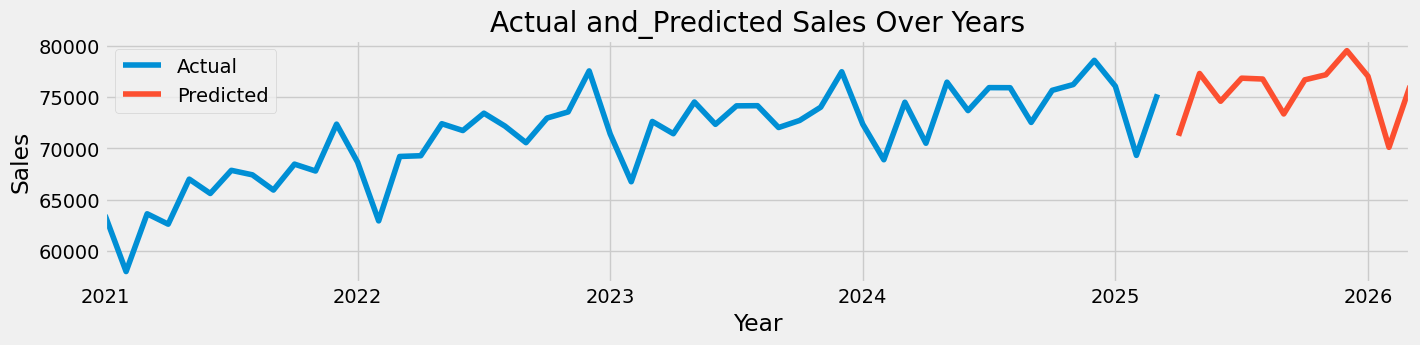

In [ ]:
# plotting actual and predicted sales over years
plt.figure(figsize=(15,3))
df["sales"].plot(legend=True, label="Actual")
pred_df["predicted"].plot(legend=True, label="Predicted")
plt.title("Actual and_Predicted Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

SARIMAX Model has captured the seasonality well which was not captured by ARIMA Model